In [9]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def euclidean_dist(a, b):
    return np.linalg.norm(a - b)

In [12]:
# Example sequences
sequence1 = np.array([1, 2, 3, 4, 5])
sequence2 = np.array([1, 3, 4, 6])

In [13]:
# Function to calculate DTW distance and path
def dtw(sequence1, sequence2):
    n = len(sequence1)
    m = len(sequence2)

    # Create the cost matrix
    cost = np.zeros((n, m))

    # Initialize the first cell
    cost[0, 0] = euclidean_dist(sequence1[0], sequence2[0])

    # Initialize the first column
    for i in range(1, n):
        cost[i, 0] = cost[i - 1, 0] + euclidean_dist(sequence1[i], sequence2[0])

    # Initialize the first row
    for j in range(1, m):
        cost[0, j] = cost[0, j - 1] + euclidean_dist(sequence1[0], sequence2[j])

    # Populate the rest of the cost matrix
    for i in range(1, n):
        for j in range(1, m):
            cost[i, j] = euclidean_dist(sequence1[i], sequence2[j]) + min(
                cost[i - 1, j],    # insertion
                cost[i, j - 1],    # deletion
                cost[i - 1, j - 1] # match
            )

    # The DTW distance is the cost of aligning the last elements of the sequences
    dtw_distance = cost[n - 1, m - 1]

    # Reconstruct the optimal path
    path = []
    i, j = n - 1, m - 1
    path.append((i, j))
    while i > 0 or j > 0:
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            min_cost = min(cost[i - 1, j], cost[i, j - 1], cost[i - 1, j - 1])
            if min_cost == cost[i - 1, j]:
                i -= 1
            elif min_cost == cost[i, j - 1]:
                j -= 1
            else:
                i -= 1
                j -= 1
        path.append((i, j))

    path.reverse()

    return dtw_distance, path

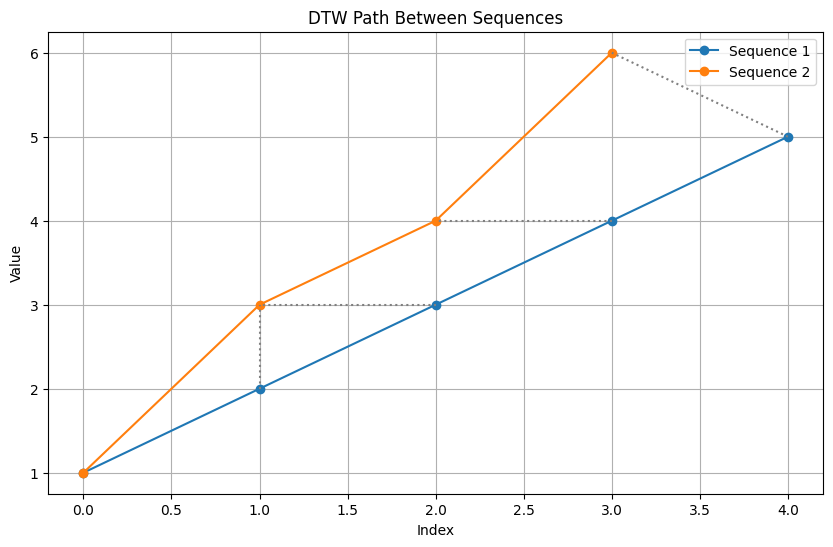

(2.0, [(0, 0), (1, 1), (2, 1), (3, 2), (4, 3)])

In [14]:
# Calculate DTW distance and path
dtw_distance, path = dtw(sequence1, sequence2)

# Plot the sequences and the DTW path
plt.figure(figsize=(10, 6))

# Plot sequences
plt.plot(sequence1, label='Sequence 1', marker='o')
plt.plot(sequence2, label='Sequence 2', marker='o')

# Plot DTW path
for (i, j) in path:
    plt.plot([i, j], [sequence1[i], sequence2[j]], color='gray', linestyle='dotted')

plt.title('DTW Path Between Sequences')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

dtw_distance, path


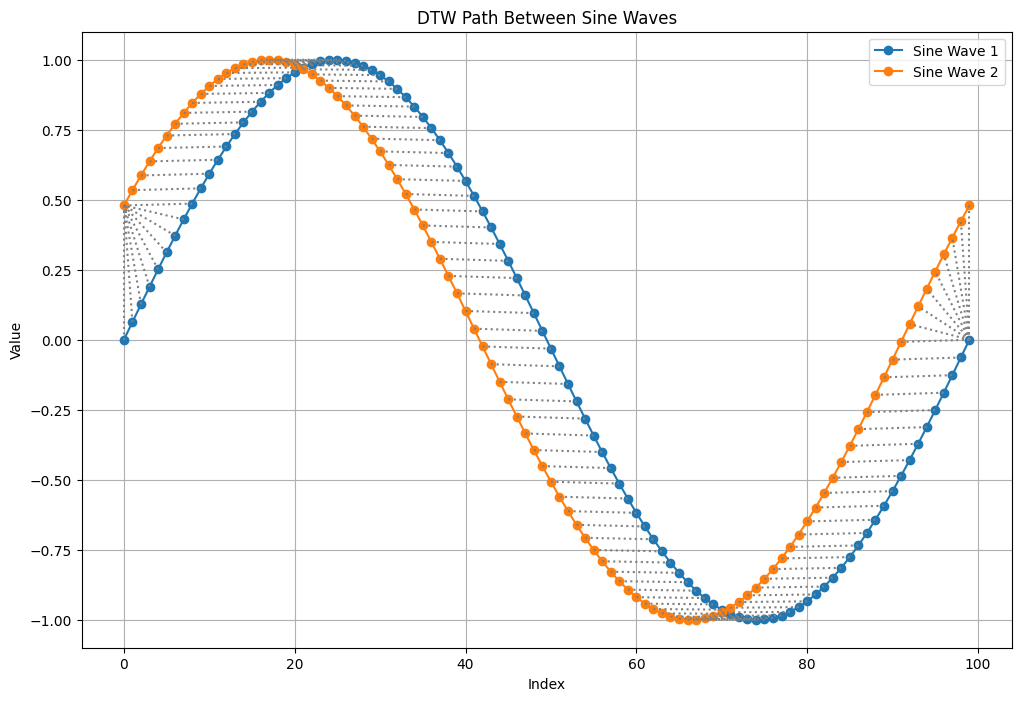

(4.698125122055136,
 [(0, 0),
  (1, 0),
  (2, 0),
  (3, 0),
  (4, 0),
  (5, 0),
  (6, 0),
  (7, 0),
  (8, 0),
  (9, 1),
  (10, 2),
  (11, 3),
  (12, 4),
  (13, 5),
  (14, 6),
  (15, 7),
  (16, 8),
  (17, 9),
  (18, 10),
  (19, 11),
  (20, 12),
  (21, 13),
  (22, 14),
  (23, 15),
  (24, 16),
  (25, 17),
  (26, 18),
  (27, 19),
  (28, 20),
  (29, 21),
  (30, 22),
  (31, 23),
  (32, 24),
  (33, 25),
  (34, 26),
  (35, 27),
  (36, 28),
  (37, 29),
  (38, 30),
  (39, 31),
  (40, 32),
  (41, 33),
  (42, 34),
  (43, 35),
  (44, 36),
  (45, 37),
  (46, 38),
  (47, 39),
  (48, 40),
  (49, 41),
  (50, 42),
  (51, 43),
  (52, 44),
  (53, 45),
  (54, 46),
  (55, 47),
  (56, 48),
  (57, 49),
  (58, 50),
  (59, 51),
  (60, 52),
  (61, 53),
  (62, 54),
  (63, 55),
  (64, 56),
  (65, 57),
  (66, 58),
  (67, 59),
  (68, 60),
  (69, 61),
  (70, 62),
  (71, 63),
  (72, 64),
  (73, 65),
  (74, 66),
  (75, 67),
  (76, 68),
  (77, 69),
  (78, 70),
  (79, 71),
  (80, 72),
  (81, 73),
  (82, 74),
  (83, 75),


In [15]:
# Generate two sine waves with a slight time shift (warp) for visualization
x = np.linspace(0, 2 * np.pi, 100)
sine_wave_1 = np.sin(x)
sine_wave_2 = np.sin(x + 0.5)  # Slightly shifted

# Calculate DTW distance and path
dtw_distance, path = dtw(sine_wave_1, sine_wave_2)

# Plot the sine waves and the DTW path
plt.figure(figsize=(12, 8))

# Plot sine waves
plt.plot(sine_wave_1, label='Sine Wave 1', marker='o')
plt.plot(sine_wave_2, label='Sine Wave 2', marker='o')

# Plot DTW path
for (i, j) in path:
    plt.plot([i, j], [sine_wave_1[i], sine_wave_2[j]], color='gray', linestyle='dotted')

plt.title('DTW Path Between Sine Waves')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

dtw_distance, path